Kütüphanelerin Kurulması



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('eksikveriler.csv')
# print(veriler)
boy = veriler[["boy"]]
# print(boy)

# eksik verilerin ortalamasını alıp doldurma
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Yas = veriler.iloc[:,1:4].values
imputer = imputer.fit(Yas[:,1:4])
Yas[:,1:4] = imputer.transform(Yas[:,1:4])
# print(Yas)

# kategorik verileri sayısal verilere çevirme
ulke = veriler.iloc[:,0:1].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ulke[:,0] = le.fit_transform(veriler.iloc[:,0])

ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()
# print(ulke)

sonuc=pd.DataFrame(data=ulke, index=range(22), columns=['fr','tr','us'])
# print(sonuc)
sonuc2 = pd.DataFrame(data=Yas, index=range(22), columns=['boy','kilo','yas'])
sonuc3 = pd.DataFrame(data=veriler.iloc[:,-1].values, index=range(22), columns=['cinsiyet'])

s=pd.concat([sonuc, sonuc2], axis=1)
s2=pd.concat([s, sonuc3], axis=1)
# print(s2)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s, sonuc3, test_size=0.33, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
# print(x_train)
# print(X_train)


Prediction Tahmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('satislar.csv')
# print(veriler)
aylar = veriler[["Aylar"]]
satislar = veriler[["Satislar"]]
satislar2 = veriler.iloc[:,:1].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(aylar, satislar, test_size=0.33, random_state=0)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.transform(x_test)

# Y_train = sc.fit_transform(y_train)
# Y_test = sc.transform(y_test)

#model inşası
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train, Y_train)

# tahmin = lr.predict(X_test)
# X_train = X_train.sort_index()
# Y_train = Y_train.sort_index()
# plt.plot(X_train, Y_train)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

tahmin = lr.predict(x_test)
# print(tahmin)
# print(y_test)

x_train = x_train.sort_index()
y_train = y_train.sort_index()
plt.plot(x_train, y_train)
plt.plot(x_test, lr.predict(x_test))

Çoklu Lineer Regresyon


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')

# kategorik verileri sayısal verilere çevirme
ulke = veriler.iloc[:,0:1].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ulke[:,0] = le.fit_transform(veriler.iloc[:,0])

ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()

c = veriler.iloc[:,-1:].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
c[:,-1] = le.fit_transform(veriler.iloc[:,-1])

ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()
# print(c)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Yas = veriler.iloc[:,1:4].values
imputer = imputer.fit(Yas[:,1:4])
Yas[:,1:4] = imputer.transform(Yas[:,1:4])

sonuc=pd.DataFrame(data=ulke, index=range(22), columns=['fr','tr','us'])
# print(sonuc)
sonuc2 = pd.DataFrame(data=Yas, index=range(22), columns=['boy','kilo','yas'])
sonuc3 = pd.DataFrame(data=c[:,:1], index=range(22), columns=['cinsiyet'])

s=pd.concat([sonuc, sonuc2], axis=1)
s2=pd.concat([s, sonuc3], axis=1)
# print(s2)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s2, sonuc3, test_size=0.33, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

boy = s2.iloc[:,3:4].values
sol = s2.iloc[:,:3]
sag = s2.iloc[:,4:]
veri = pd.concat([sol, sag], axis=1)

x_train, x_test, y_train, y_test = train_test_split(veri, boy, test_size=0.33, random_state=0)

r2 = LinearRegression()
r2.fit(x_train, y_train)

y_pred = r2.predict(x_test)

import statsmodels.api as sm

X = np.append(arr = np.ones((22,1)).astype(int), values=veri, axis=1)

# X_l = veri.iloc[:,[0,1,2,3,4,5]].values
# X_l = np.array(X_l, dtype=float)

# model = sm.OLS(boy, X_l).fit()
# print(model.summary()) # P değeri en büyük olanı eledik 5.si 0.7 çıktı

X_l = veri.iloc[:,[0,1,2,3,5]].values
X_l = np.array(X_l, dtype=float)

model = sm.OLS(boy, X_l).fit()
print(model.summary())


Ödev Tenis (Kendi çözümüm)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('odev_tenis.csv')

# kategorik verileri sayısal verilere çevirme
hava = veriler.iloc[:,0:1].values
# print(hava)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
hava[:,0] = le.fit_transform(veriler.iloc[:,0])

ohe = preprocessing.OneHotEncoder()
hava = ohe.fit_transform(hava).toarray()
# print(hava)

# kategorik verileri sayısal verilere çevirme
ruzgar = veriler.iloc[:,3].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ruzgar = le.fit_transform(ruzgar)
# print(ruzgar)

oyun = veriler.iloc[:,-1:].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
oyun[:,-1] = le.fit_transform(veriler.iloc[:,-1])

ohe = preprocessing.OneHotEncoder()
oyun = ohe.fit_transform(oyun).toarray()
# print(oyun[:,-1])

satir_sayisi = veriler.shape[0]
sonuc=pd.DataFrame(data=hava, index=range(satir_sayisi), columns=['overcast','rainy','sunny'])
# print(sonuc)
sonuc2 = pd.DataFrame(data=oyun[:,-1], index=range(satir_sayisi), columns=['play'])
# print(sonuc2)
sonuc3 = pd.DataFrame(data=ruzgar, index=range(satir_sayisi), columns=['windy'])
# print(veriler.iloc[:,2:3])

s=pd.concat([sonuc, veriler.iloc[:,1:2]], axis=1)
# print(s)
s2=pd.concat([sonuc3, sonuc2], axis=1)
# print(s2)
s3=pd.concat([s, s2], axis=1)
# print(s3)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s3, veriler.iloc[:,2:3], test_size=0.33, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
# print(y_pred)
# print(y_test)

# print(s3)
# r2 = LinearRegression()
# r2.fit(x_train, y_train)

# y_pred = r2.predict(x_test)

import statsmodels.api as sm

X = np.append(arr = np.ones((satir_sayisi,1)).astype(int), values=s3, axis=1)

X_l = s3.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l, dtype=float)

model = sm.OLS(veriler.iloc[:,2:3], X_l).fit()
print(model.summary())


Tenis Ödev Çözüm


In [ ]:

#1. kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
#2. Veri Onisleme

#2.1. Veri Yukleme
veriler = pd.read_csv('odev_tenis.csv')
#pd.read_csv("veriler.csv")


#veri on isleme

#encoder:  Kategorik -> Numeric
veriler2 = veriler.apply(LabelEncoder().fit_transform)
# print(veriler2)

c = veriler2.iloc[:,:1]
from sklearn.preprocessing import OneHotEncoder
ohe = preprocessing.OneHotEncoder()

c = ohe.fit_transform(c).toarray()
# print(c)

havadurumu = pd.DataFrame(data = c, index = range(14), columns=['o','r','s'])
# print(havadurumu)
sonveriler = pd.concat([havadurumu,veriler.iloc[:,1:3]],axis = 1)
sonveriler = pd.concat([veriler2.iloc[:,-2:],sonveriler], axis = 1)


#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split  # Doğru modül
x_train, x_test, y_train, y_test = train_test_split(
    sonveriler.iloc[:, :-1], 
    sonveriler.iloc[:, -1:], 
    test_size=0.33, 
    random_state=0
)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)


y_pred = regressor.predict(x_test)

print(y_pred)
#backward elimination
import statsmodels.formula.api as sm 
X = np.append(arr = np.ones((14,1)).astype(int), values=sonveriler.iloc[:,:-1], axis=1 )
X_l = sonveriler.iloc[:,[0,1,2,3,4,5]].values
r_ols = sm.OLS(endog = sonveriler.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
# print(r.summary())

sonveriler = sonveriler.iloc[:,1:]

import statsmodels.formula.api as sm 
X = np.append(arr = np.ones((14,1)).astype(int), values=sonveriler.iloc[:,:-1], axis=1 )
X_l = sonveriler.iloc[:,[0,1,2,3,4]].values
r_ols = sm.OLS(endog = sonveriler.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
# print(r.summary())

x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]

regressor.fit(x_train,y_train)


y_pred = regressor.predict(x_test)









Polinomal Regresyonlar


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('maaslar.csv') 
x=veriler.iloc[:,1:2]
y=veriler.iloc[:,2:]
X=x.values
Y=y.values

# doğrusal model oluşturma
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)



# doğrusal olmayan (nonlinear) model oluşturma
# 2.dereceden
from sklearn.preprocessing import PolynomialFeatures
poly_reg2= PolynomialFeatures(degree=2)
x_poly2 = poly_reg2.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly2,y)

# 4.dereceden polinom
from sklearn.preprocessing import PolynomialFeatures
poly_reg3 = PolynomialFeatures(degree=4)
x_poly3 = poly_reg3.fit_transform(X)
lin_reg3= LinearRegression()
lin_reg3.fit(x_poly3,y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color='blue')
plt.show()

plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg2.fit_transform(X)), color='blue')
plt.show()

plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg3.predict(poly_reg3.fit_transform(X)), color='blue')
plt.show()

Destek Vektör Regresyonu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('maaslar.csv') 
x=veriler.iloc[:,1:2]
y=veriler.iloc[:,2:]
X=x.values
Y=y.values

# doğrusal model oluşturma
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli = sc2.fit_transform(Y)

from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli), color='blue')

Karar Ağacı ile Tahmin (Decision Tree)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('maaslar.csv') 
x=veriler.iloc[:,1:2]
y=veriler.iloc[:,2:]
X=x.values
Y=y.values


from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)
plt.scatter(X,Y,color='red')
plt.plot(X,r_dt.predict(X), color='blue')

Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('maaslar.csv') 
x=veriler.iloc[:,1:2]
y=veriler.iloc[:,2:]
X=x.values
Y=y.values

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X,Y)
# plt.scatter(X,Y,color='red')
# plt.plot(X,rf_reg.predict(X), color='blue')
# plt.show()

print(rf_reg.predict([[6.6]]))


R square Yöntemi


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('maaslar.csv') 
x=veriler.iloc[:,1:2]
y=veriler.iloc[:,2:]
X=x.values
Y=y.values

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X,Y)
plt.scatter(X,Y,color='red')
plt.plot(X,rf_reg.predict(X), color='blue')
plt.show()

print(rf_reg.predict([[6.6]]))

from sklearn.metrics import r2_score
r2_score(Y,rf_reg.predict(X))

Ödev 2 Maaslar Yeni

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
# veri yukleme
veriler = pd.read_csv('maaslar_yeni.csv')

x = veriler.iloc[:,2:5]
y = veriler.iloc[:,5:]
X = x.values
Y = y.values

# print(veriler.corr())

#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)


model=sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))


#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)


#tahminler


print('poly OLS')
model2=sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(model2.fit().summary())

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))


from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)


print('SVR OLS')
model3=sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
print(model3.fit().summary())


print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

#Decision Tree Regresyon
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)


print('Decision Tree OLS')
model4=sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())

print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

#Random Forest Regresyonu
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())



print('Random Forest OLS')
model5=sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())



print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))


#Ozet R2 değerleri
print('-----------------------')
print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))
















Classification

Logistic Regresyon

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
# print(X_train)
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)


Confusion Matris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
# print(X_train)
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

K-NN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

SVM Algoritması

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Kernel Trick


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.svm import SVC
svc = SVC(kernel='rbf ') # rbf = radial basis function (gaussian kernel) , poly,linear vs.
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


ROC TPR FPR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veriler = pd.read_csv('veriler.csv')
x=veriler.iloc[:,1:4]
y=veriler.iloc[:,4:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
# print(x_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


y_proba = rfc.predict_proba(X_test)
# print(y_test)
# print(y_proba[:,0])

from sklearn import metrics
fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(fpr)
print(tpr)

Odev Iris Çözümü

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_excel('iris.xls')
#pd.read_csv("veriler.csv")
#test
# print(veriler)

x = veriler.iloc[:,1:4].values #bağımsız değişkenler
y = veriler.iloc[:,4:].values #bağımlı değişken
# print(y)

#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
# print(y_pred)
# print(y_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('LR')
print(cm)



from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('KNN')
print(cm)



from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)



from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)


    
# 7. ROC , TPR, FPR değerleri 

y_proba = rfc.predict_proba(X_test)
# print(y_test)
# print(y_proba[:,0])

from sklearn import metrics
fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(fpr)
print(tpr)










Kümeleme / Bölütleme

K-Means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

veriler = pd.read_csv('musteriler.csv')

X=veriler.iloc[:,3:].values
Y=veriler.iloc[:,4:].values

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)

sonuclar = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)
    plt.scatter(X[:,0],X[:,1])
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
    plt.show()

Hiyerarşik Kümeleme

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


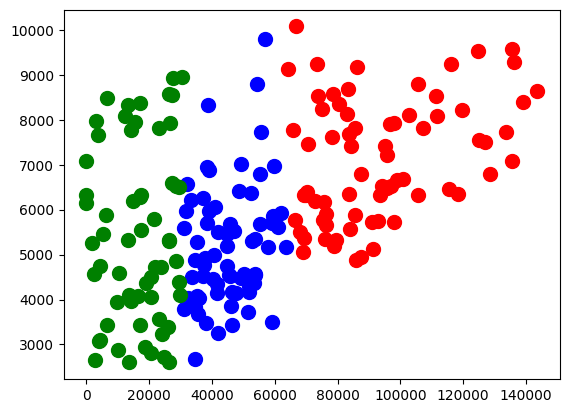

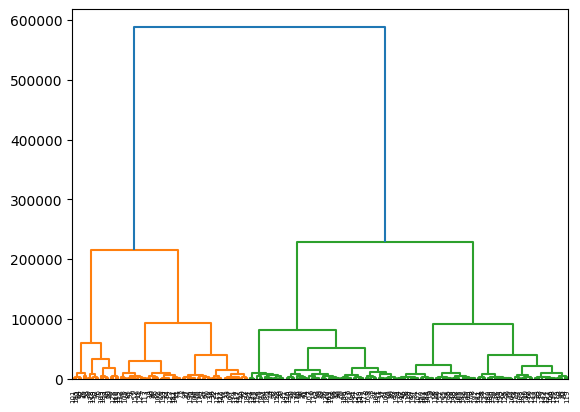

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

veriler = pd.read_csv('musteriler.csv')

X=veriler.iloc[:,3:].values
Y=veriler.iloc[:,4:].values

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,  linkage='ward', metric='euclidean')
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100,c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100,c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100,c='green')
plt.show()

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

